In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# TASK 1.1
def read_gff(path_to_gff):
    """.gff reader
    """
    df_gff = pd.read_csv(path_to_gff, sep='\t', comment='#',
                       names=['chromosome', 'sourse', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    return df_gff

In [3]:
# reading rrna_annotation.gff
rrna_annotation = read_gff('rrna_annotation.gff')
rrna_annotation

,chromosome,sourse,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [4]:
def read_bed6(path_to_bed):
    """.bed6 reader
    """
    df_bed = pd.read_csv(path_to_bed, sep='\t', comment='#',
                       names=['chromosome', 'start', 'end', 'name', 'score', 'strand'])
    return df_bed

In [5]:
# reading rrna_annotation.gff
alignment = read_bed6('alignment.bed')
alignment

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [6]:
def ribosome_type_finder(string):
    """Finds ribosome type in string
    """
    return re.search(r'(\d+S)', string)[0]

In [7]:
# TASK 1.2
# creating a new data frame with only RNA type in attributes column
my_rrna_annotation = rrna_annotation.copy()
my_rrna_annotation['attributes'] = my_rrna_annotation['attributes'].apply(ribosome_type_finder, 0)
my_rrna_annotation

,chromosome,sourse,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [8]:
# renaming column with only RNA type in new data frame
my_rrna_annotation.rename(columns={'attributes': 'RNA type'}, inplace=True)
my_rrna_annotation

,chromosome,sourse,type,start,end,score,strand,phase,RNA type
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [9]:
# TASK 1.3
# grouping annotation by chromosome and RNA type with counting RNA within one type
grouped_rrna_annotation = my_rrna_annotation.groupby(['chromosome', 'RNA type']).agg({'RNA type':'count'})
grouped_rrna_annotation = grouped_rrna_annotation.rename(columns={'RNA type': 'Count RNA types'}).reset_index()
grouped_rrna_annotation

,chromosome,RNA type,Count RNA types
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


[Text(0, 0, 'Reference_1'),
 Text(1, 0, 'Reference_10'),
 Text(2, 0, 'Reference_11'),
 Text(3, 0, 'Reference_12'),
 Text(4, 0, 'Reference_13'),
 Text(5, 0, 'Reference_14'),
 Text(6, 0, 'Reference_15'),
 Text(7, 0, 'Reference_16'),
 Text(8, 0, 'Reference_17'),
 Text(9, 0, 'Reference_18'),
 Text(10, 0, 'Reference_19'),
 Text(11, 0, 'Reference_2'),
 Text(12, 0, 'Reference_20'),
 Text(13, 0, 'Reference_21'),
 Text(14, 0, 'Reference_22'),
 Text(15, 0, 'Reference_23'),
 Text(16, 0, 'Reference_24'),
 Text(17, 0, 'Reference_25'),
 Text(18, 0, 'Reference_26'),
 Text(19, 0, 'Reference_3'),
 Text(20, 0, 'Reference_4'),
 Text(21, 0, 'Reference_5'),
 Text(22, 0, 'Reference_6'),
 Text(23, 0, 'Reference_7'),
 Text(24, 0, 'Reference_8'),
 Text(25, 0, 'Reference_9')]

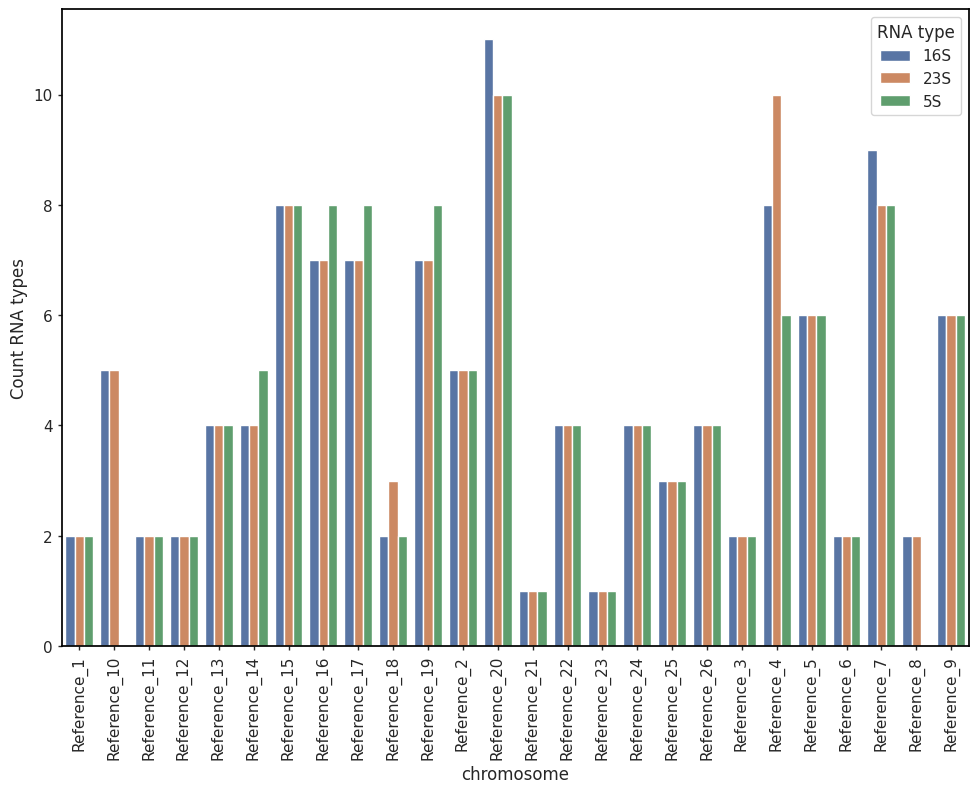

In [10]:
# building barplot for grouped_rrna_annotation
sns.set(rc={'figure.figsize':(11.7, 8.27),
           'axes.facecolor': 'white', 
             'axes.edgecolor': 'black',
            'xtick.minor.visible': True})
bar_plot_count_RNA_types = sns.barplot(x='chromosome', 
                                       y='Count RNA types', 
                                       hue='RNA type', 
                                       data=grouped_rrna_annotation)
sns.move_legend(bar_plot_count_RNA_types, "upper right")
bar_plot_count_RNA_types.grid(False)
bar_plot_count_RNA_types.tick_params(which='major', direction="out", left=True, bottom=True, width=1, size=3)
bar_plot_count_RNA_types.spines['left'].set_color('black')
bar_plot_count_RNA_types.spines['right'].set_color('black')
bar_plot_count_RNA_types.spines['top'].set_color('black')
bar_plot_count_RNA_types.spines['bottom'].set_color('black')
bar_plot_count_RNA_types.set_xticklabels(bar_plot_count_RNA_types.get_xticklabels(), rotation = 90)


In [16]:
# TASK 1.4
# Performing the functions of the bedtools intersect with pandas. 
# Finding out how much rRNA was successfully assembled during the assembly process. 
# Outputing a table containing the original records about rRNA completely included in the assembly (not a fragment), 
# as well as a record about the contig in which this RNA is.
intersection = pd.merge(rrna_annotation, alignment, 
                   how='inner', 
                   left_on=['chromosome'], 
                   right_on=['chromosome'])
intersection

,chromosome,sourse,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126743,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,Name=16S_rRNA;product=16S ribosomal RNA,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126744,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,Name=16S_rRNA;product=16S ribosomal RNA,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126745,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,Name=16S_rRNA;product=16S ribosomal RNA,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126746,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,Name=16S_rRNA;product=16S ribosomal RNA,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


In [17]:
intersection = intersection.query('start_y <= start_x')
intersection = intersection.query('end_y >= end_x') 
intersection.drop_duplicates()
intersection

,chromosome,sourse,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,Name=5S_rRNA;product=5S ribosomal RNA,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,Name=5S_rRNA;product=5S ribosomal RNA,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,Name=5S_rRNA;product=5S ribosomal RNA,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


In [18]:
# TASK 2
# reading diffexpr_data.tsv.gz
diffexpr = pd.read_csv("diffexpr_data.tsv.gz", compression='gzip', sep='\t')
diffexpr

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [19]:
# creating a data frame to build the plot: putting four different types of regulation in a separate column
sign_up = diffexpr.query('log_pval > 1.3 and logFC >= 0')
sign_up['Regulation']='Significantly upregulated'
nonsign_up = diffexpr.query('log_pval <= 1.3 and logFC >= 0')
nonsign_up['Regulation']='Non-significantly upregulated'
nonsign_down = diffexpr.query('log_pval <= 1.3 and logFC < 0')
nonsign_down['Regulation']='Non-significantly downregulated'
sign_down = diffexpr.query('log_pval > 1.3 and logFC < 0')
sign_down['Regulation']='Significantly downregulated'
my_diffexpr = pd.concat((sign_down,sign_up, nonsign_down, nonsign_up), axis=0)
my_diffexpr

/tmp/ipykernel_5011/3949549190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_up['Regulation']='Significantly upregulated'
/tmp/ipykernel_5011/3949549190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsign_up['Regulation']='Non-significantly upregulated'
/tmp/ipykernel_5011/3949549190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Sample,logFC,pval,pval_corr,log_pval,Regulation
12766,DEFB108B,-0.015495,3.849463e-07,0.007903,2.102211,Significantly downregulated
14665,OR5K1,-0.165837,2.066955e-06,0.042435,1.372280,Significantly downregulated
14857,WDR20,-0.184514,5.200393e-07,0.010676,1.971575,Significantly downregulated
14914,C10orf76,-0.189598,6.069643e-09,0.000125,3.904448,Significantly downregulated
15019,CUL3,-0.199104,3.976900e-09,0.000082,4.088066,Significantly downregulated
...,...,...,...,...,...,...
12493,SNORD11,0.000000,1.000000e+00,1.000000,-0.000000,Non-significantly upregulated
12494,SNORD86,0.000000,1.000000e+00,1.000000,-0.000000,Non-significantly upregulated
12495,SNORD95,0.000000,1.000000e+00,1.000000,-0.000000,Non-significantly upregulated
12496,SNORD114-19,0.000000,1.000000e+00,1.000000,-0.000000,Non-significantly upregulated


Text(7, 11, 'ZIC2')

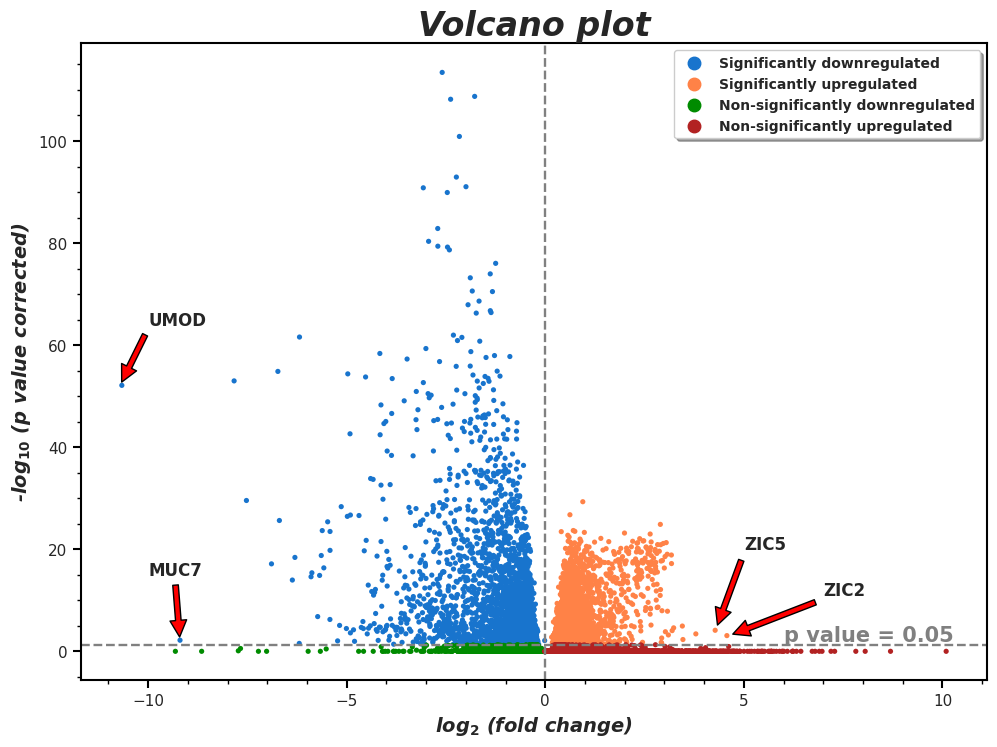

In [20]:
# building volcano plot
volcano = sns.scatterplot(data=my_diffexpr, 
                          x='logFC', 
                          y='log_pval', 
                          s=14, 
                          hue=my_diffexpr['Regulation'],
                          palette=['#1874CD', '#FF8247', '#008B00', '#B22222'],
                          linewidth=0)
volcano.grid(False)
volcano.spines['left'].set_color('black')
volcano.spines['right'].set_color('black')
volcano.spines['top'].set_color('black')
volcano.spines['bottom'].set_color('black')
volcano.spines['left'].set_linewidth(1.5)
volcano.spines['right'].set_linewidth(1.5)
volcano.spines['top'].set_linewidth(1.5)
volcano.spines['bottom'].set_linewidth(1.5)
volcano.minorticks_on()
volcano.tick_params(which='major', direction="out", left=True, bottom=True, width=1.5, size=6, color='black')
volcano.tick_params(which='minor', direction="out", left=True, bottom=True, width=1, size=3, color='black')
volcano.axhline(y=1.3, ls='--', c='grey', linewidth=1.7)
volcano.axvline(x=0, ls='--', c='grey', linewidth=1.7)
volcano.set_title('Volcano plot', size=24, style='italic', weight='bold')
volcano.set_xlabel('log$\mathbf{_2}$ (fold change)', size=14, style='italic', weight='bold')
volcano.set_ylabel('-log$\mathbf{_{10}}$ (p value corrected)', size=14, style='italic', weight='bold')
volcano.legend(shadow='right_bottom', markerscale=1.5, prop={'weight':'bold', 'size': 10})
volcano.text(6, 2, 'p value = 0.05', fontsize=15, color='grey', weight='bold')
volcano.annotate('UMOD', 
                 xy =(-10.7, 52.2),
                 xytext =(-10, 64),
                 weight='bold',
                 arrowprops = dict(facecolor ='red',
                                   shrink = 0.05,
                                  edgecolor='black'))
volcano.annotate('MUC7', 
                 xy =(-9.2, 2.2),
                 xytext =(-10, 15),
                 weight='bold',
                 arrowprops = dict(facecolor ='red',
                                   shrink = 0.05,
                                  edgecolor='black'))
volcano.annotate('ZIC5', 
                 xy =(4.3, 4.4),
                 xytext =(5, 20),
                 weight='bold',
                 arrowprops = dict(facecolor ='red',
                                   shrink = 0.05,
                                  edgecolor='black'))
volcano.annotate('ZIC2', 
                 xy =(4.6, 3),
                 xytext =(7, 11),
                 weight='bold',
                 arrowprops = dict(facecolor ='red',
                                   shrink = 0.05,
                                  edgecolor='black'))


In [21]:
# TASK 3
# reading owid-covid-data.csv
covid = pd.read_csv("owid-covid-data.csv")
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [22]:
# estimating the NaNs
covid.isna().sum()

iso_code                                        0
continent                                   12673
location                                        0
date                                            0
total_cases                                  8966
                                            ...  
human_development_index                     44243
excess_mortality_cumulative_absolute       212883
excess_mortality_cumulative                212883
excess_mortality                           212836
excess_mortality_cumulative_per_million    212883
Length: 67, dtype: int64

In [23]:
# We see that in case of NaNs in total_cases column the most other columns are also shows NaNs.
covid.query('total_cases.isna()')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
950,OWID_AFR,NaN,Africa,2/13/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911,ALB,Europe,Albania,2/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1912,ALB,Europe,Albania,2/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1913,ALB,Europe,Albania,2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1914,ALB,Europe,Albania,2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209500,VIR,North America,United States Virgin Islands,6/16/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.58,NaN,NaN,NaN,NaN,NaN
209501,VIR,North America,United States Virgin Islands,6/17/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.58,NaN,NaN,NaN,NaN,NaN
209502,VIR,North America,United States Virgin Islands,6/18/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.58,NaN,NaN,NaN,NaN,NaN
209503,VIR,North America,United States Virgin Islands,6/19/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.58,NaN,NaN,NaN,NaN,NaN


In [24]:
covid['total_cases'].isna().sum()

8966

In [25]:
# So we can delete these rows and look at our data again.
# We see that total_cases NaNs were successfully removed as well as NaN in several other columns of which we were wrote above.
# Now we have many NaNs in location column.
covid.drop(covid[covid.total_cases.isna()].index, inplace=True)
covid.isna().sum()

iso_code                                        0
continent                                   12666
location                                        0
date                                            0
total_cases                                     0
                                            ...  
human_development_index                     36477
excess_mortality_cumulative_absolute       204071
excess_mortality_cumulative                204071
excess_mortality                           204024
excess_mortality_cumulative_per_million    204071
Length: 67, dtype: int64

In [26]:
# Have a look on them.
# We see that in these cases the three-letter iso encoding is not respected. 
covid.query('continent.isna()')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
951,OWID_AFR,NaN,Africa,2/14/2020,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952,OWID_AFR,NaN,Africa,2/15/2020,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,OWID_AFR,NaN,Africa,2/16/2020,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,OWID_AFR,NaN,Africa,2/17/2020,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,OWID_AFR,NaN,Africa,2/18/2020,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217582,OWID_WRL,NaN,World,9/26/2022,615466698.0,463803.0,448348.143,6538226.0,1325.0,1452.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
217583,OWID_WRL,NaN,World,9/27/2022,616069249.0,602551.0,456115.857,6539637.0,1531.0,1427.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
217584,OWID_WRL,NaN,World,9/28/2022,616550457.0,481208.0,451048.714,6541769.0,2132.0,1438.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
217585,OWID_WRL,NaN,World,9/29/2022,617168758.0,618301.0,451986.571,6544207.0,2439.0,1487.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [27]:
# For our rough EDA we can sacrifice this number of rows. Removing them.
covid.drop(covid[covid.continent.isna()].index, inplace=True)
covid.isna().sum()

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                     0
                                            ...  
human_development_index                     24794
excess_mortality_cumulative_absolute       191405
excess_mortality_cumulative                191405
excess_mortality                           191358
excess_mortality_cumulative_per_million    191405
Length: 67, dtype: int64

In [28]:
# We see too much NaN rows or different deaths and mortality statistics, we can not remove them.
# We will not analyze these statistics in our EDA.
covid.query('excess_mortality.isna()')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [29]:
# We see 3843 NaNs in people_fully_vaccinated column.
covid['people_fully_vaccinated'].isna().sum()

150240

In [30]:
# For our rough EDA we can sacrifice this number of rows. Removing them.
covid.drop(covid[covid.people_fully_vaccinated.isna()].index, inplace=True)
covid.isna().sum()

iso_code                                       0
continent                                      0
location                                       0
date                                           0
total_cases                                    0
                                           ...  
human_development_index                     3431
excess_mortality_cumulative_absolute       45259
excess_mortality_cumulative                45259
excess_mortality                           45231
excess_mortality_cumulative_per_million    45259
Length: 67, dtype: int64

In [31]:
# Now our data became a bit cleaner and we can start analyzing it and building some plots.
# We can look at the largest reported number of Covid cases worldwide.
# We need to group data by location, define max of total cases by countries and separate the largest number of cases.
total_cases_location = covid.groupby('location').agg({'total_cases':'max'})
total_cases_location = total_cases_location.reset_index()
total_cases_location['total_cases'] /= 1000000
total_cases_location.drop(total_cases_location[total_cases_location.total_cases < 2].index, inplace=True)
total_cases_location.sort_values(by=['total_cases'], ascending=False, inplace=True)
total_cases_location

,location,total_cases
201,United States,96.177955
89,India,44.591112
69,France,35.405188
27,Brazil,34.654190
74,Germany,33.216006
176,South Korea,24.769101
200,United Kingdom,23.521796
96,Italy,22.432803
98,Japan,21.147468
156,Russia,20.648073


<AxesSubplot: title={'center': 'The largest reported number of Covid cases by countries'}, xlabel='Total cases, m.', ylabel='Country'>

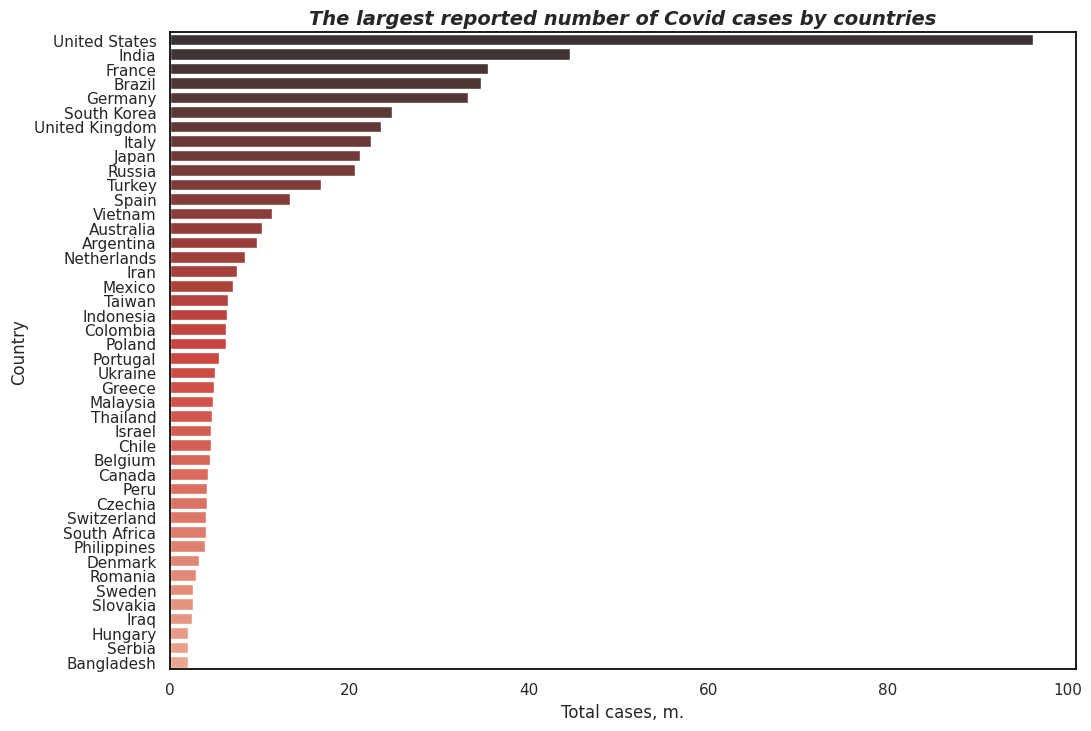

In [32]:
# building barplot for grouped total_cases_location
total_cases_location_bar = sns.barplot(x='total_cases', 
                                       y='location',
                                       palette = sns.color_palette("Reds_d", len(total_cases_location))[::-1],
                                       data=total_cases_location)

total_cases_location_bar.set_title('The largest reported number of Covid cases by countries', size=14, style='italic', weight='bold')
total_cases_location_bar.set_xlabel('Total cases, m.', size=12)
total_cases_location_bar.set_ylabel('Country')
total_cases_location_bar

# Judging by the plot, we see that the USA is the leader in the total number of cases, 
# but we should not forget that this is the third country in terms of population in the world. 
# Moreover, this is a very developed country and we can assume that the incidence statistics are kept very strictly, 
# unlike, for example, Mexico or Philippines which also have a very high population, but not such a developed and
# centralized level of medicine.

In [33]:
# Let's visualize and confirm our assumption about population.
# We need to group data by location again and by date, define max population by countries.
population_location = covid.groupby('location').agg({'population':'max'})
population_location = population_location.reset_index()
population_location['population'] /= 1000000
population_location.drop(population_location[population_location.population < 50].index, inplace=True)
population_location.sort_values(by=['population'], ascending=False, inplace=True)
population_location

,location,population
41,China,1425.893464
89,India,1407.563842
201,United States,336.997624
90,Indonesia,273.753191
145,Pakistan,231.402116
27,Brazil,214.326223
141,Nigeria,213.401323
15,Bangladesh,169.356251
156,Russia,145.102755
124,Mexico,126.705138


<AxesSubplot: title={'center': 'Countries with the highest population'}, xlabel='Population, m.', ylabel='Country'>

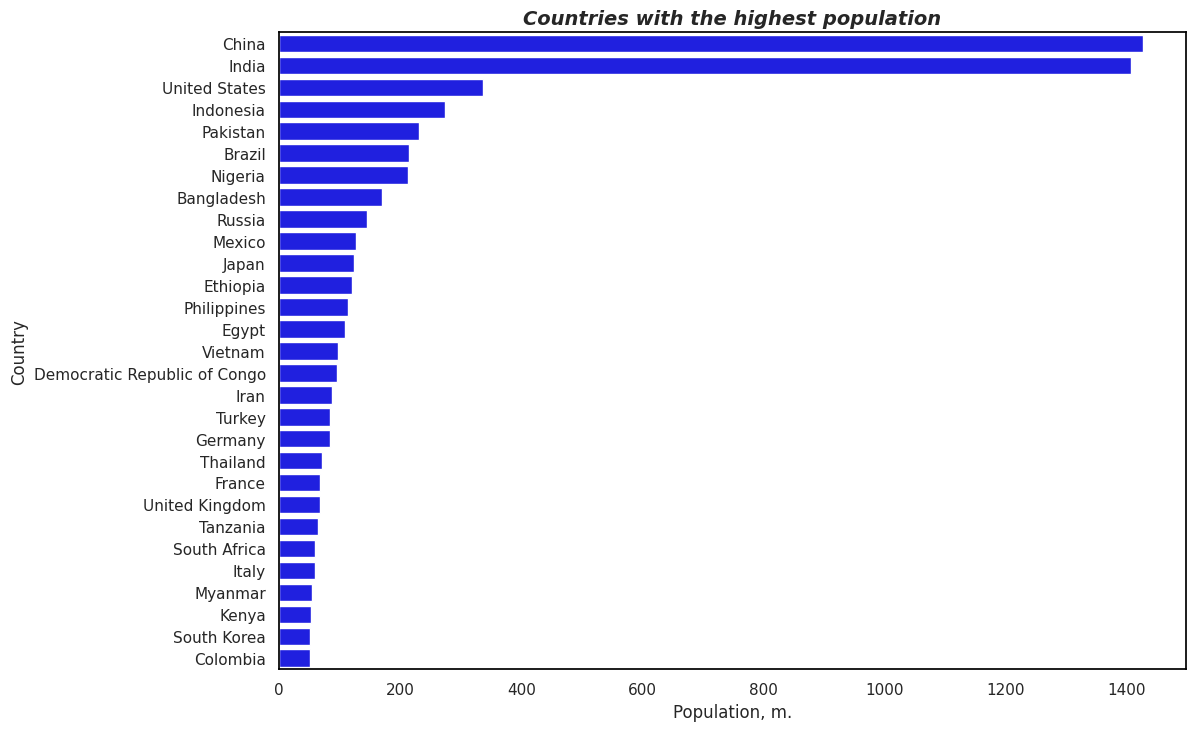

In [34]:
# building barplot for population_location
population_location_bar = sns.barplot(x='population', 
                                       y='location',
                                      color='blue',
                                      data=population_location)

population_location_bar.set_title('Countries with the highest population', size=14, style='italic', weight='bold')
population_location_bar.set_xlabel('Population, m.', size=12)
population_location_bar.set_ylabel('Country')
population_location_bar
# Indeed, Mexico and the Philippines, which we recalled, occupy a leading position in this list.

In [35]:
# We also can look at new Covid cases daily in Europe (because we are actually in Europe!)
# We need to group data by location again and by date, define sum of new cases.
new_cases_monthly_Europe = covid.groupby(['location', 'date']).agg({'new_cases':'sum'})
new_cases_monthly_Europe = new_cases_monthly_Europe.rename(columns={'new_cases': 'New cases'}).reset_index()
new_cases_monthly_Europe['date'] = new_cases_monthly_Europe['date'].apply(pd.to_datetime, 0)
new_cases_monthly_Europe.sort_values(by=['date'], inplace=True)
new_cases_monthly_Europe = new_cases_monthly_Europe.merge(total_cases_location, 
                   how='inner', 
                   left_on=['location'], 
                   right_on=['location'])
new_cases_monthly_Europe = new_cases_monthly_Europe.iloc[:, :3].drop_duplicates()

# Then we need to leave only Europe countries in our data set.
new_cases_monthly_Europe = new_cases_monthly_Europe.query('location in ["France", "Germany", "United Kingdom", '
                                                          '"Italy", "Russia", "Spain", "Poland", "Belgium", "Greece", '
                                                          '"Ukraine", "Switzerland", "Czechia", "Denmark", "Romania", '
                                                          '"Slovakia", "Sweden"]') 
new_cases_monthly_Europe


,location,date,New cases
1301,Switzerland,2020-12-21,10002.0
1302,Switzerland,2020-12-22,4275.0
1303,Switzerland,2020-12-23,5033.0
1304,Switzerland,2020-12-24,4898.0
1305,Switzerland,2020-12-25,0.0
...,...,...,...
18008,Ukraine,2022-02-17,35227.0
18009,Ukraine,2022-02-18,36993.0
18010,Ukraine,2022-02-19,33348.0
18011,Ukraine,2022-02-20,19748.0


Text(0, 0.5, 'New cases daily')

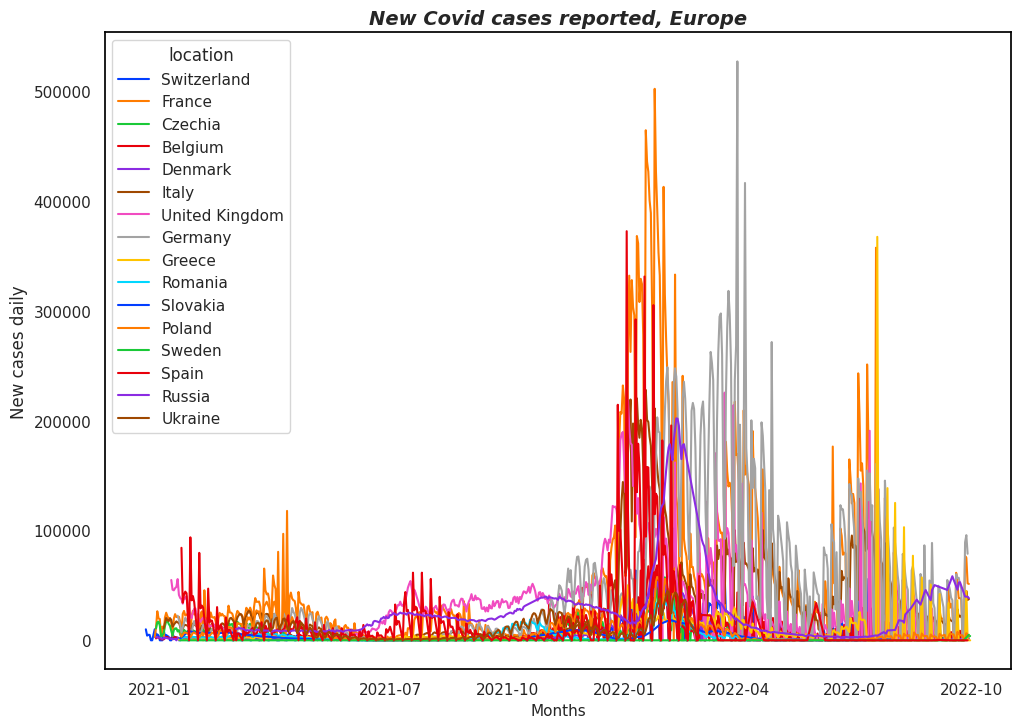

In [36]:
# building barplot for new_cases_monthly_Europe
new_cases_monthly_Europe_plot = sns.lineplot(x='date',
                                      y='New cases',
                                      hue='location',
                                             palette='bright',
                                             data=new_cases_monthly_Europe)
new_cases_monthly_Europe_plot.set_title('New Covid cases reported, Europe', size=14, style='italic', weight='bold')
new_cases_monthly_Europe_plot.set_xlabel('Months', size=11)
new_cases_monthly_Europe_plot.set_ylabel('New cases daily', size=12)

# We see approximately similar trends in the spread of the disease.
# An increase in the incidence is clearly visible with the advent of Omicron variant at the beginning of 2022. 
# The record jumps in incidence during this period in France (far over 200,000 people a day) and then (March, April) in Germany 
# are especially eye-catching, and these cases are confirmed by information from open sources.

In [37]:
# Let's look at the level of vaccination.
# We need to group data by location again and define max of fully vaccinated people by countries.
fully_vaccinated_location = covid.groupby('location').agg({'people_fully_vaccinated':'max'})
fully_vaccinated_location = fully_vaccinated_location.reset_index()
fully_vaccinated_location['people_fully_vaccinated'] /= 1000000
fully_vaccinated_location.drop(fully_vaccinated_location[fully_vaccinated_location.people_fully_vaccinated < 10].index, inplace=True)
fully_vaccinated_location.sort_values(by=['people_fully_vaccinated'], ascending=False, inplace=True)
fully_vaccinated_location

,location,people_fully_vaccinated
41,China,1271.408000
89,India,948.371253
201,United States,225.284115
27,Brazil,172.264693
90,Indonesia,170.706806
145,Pakistan,131.693740
15,Bangladesh,121.715545
98,Japan,102.837262
206,Vietnam,84.072281
124,Mexico,79.947470


<AxesSubplot: title={'center': 'Countries with the most fully vaccinated people'}, xlabel='People fully vaccinated, m.', ylabel='Country'>

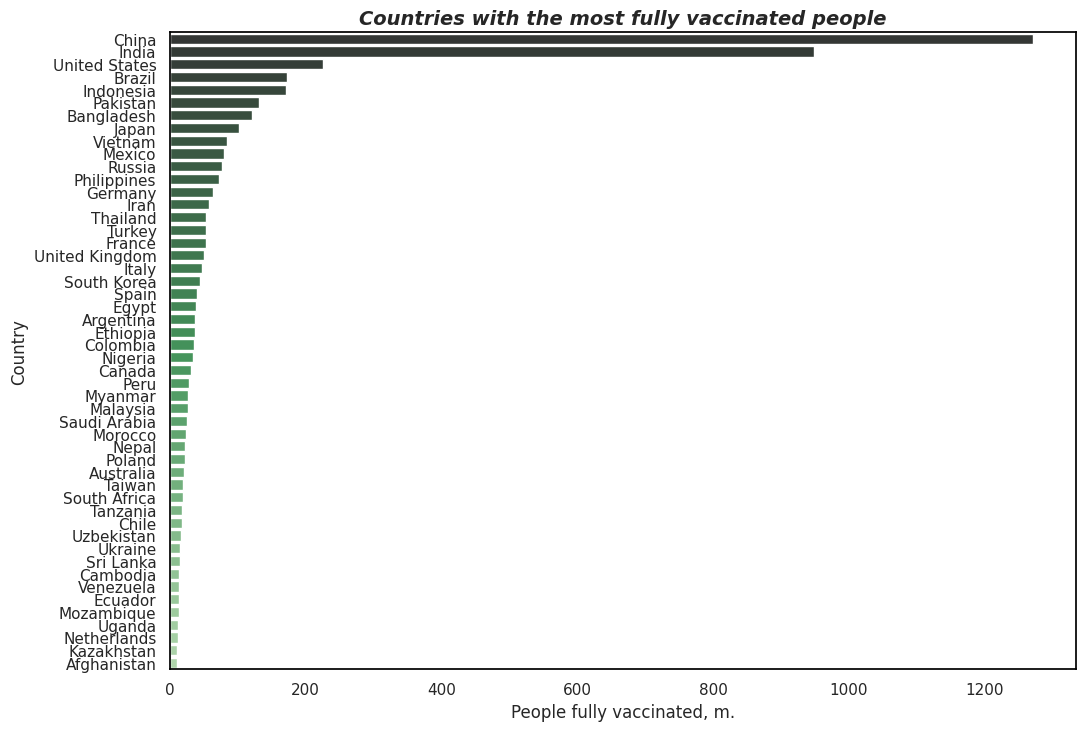

In [38]:
# building barplot for new_cases_monthly_Europe
fully_vaccinated_location_bar = sns.barplot(x='people_fully_vaccinated', 
                                       y='location',
                                       palette = sns.color_palette("Greens_d", len(fully_vaccinated_location))[::-1],
                                       data=fully_vaccinated_location)

fully_vaccinated_location_bar.set_title('Countries with the most fully vaccinated people', size=14, style='italic', weight='bold')
fully_vaccinated_location_bar.set_xlabel('People fully vaccinated, m.', size=12)
fully_vaccinated_location_bar.set_ylabel('Country')
fully_vaccinated_location_bar

# The plot shows that the most disciplined countries are China, India and USA. 
# But we should not rush to conclusions because there is a clear correlation with the population again. 
# After all, these are indeed the three leading countries in this parameter.


# The general conclusion that we can draw is that these data are very voluminous and interesting, 
# it requires special attention and a lot of time for a full-fledged analysis.